In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.optimize as opt
from tqdm import tqdm

1.1. Выборка ($X_1, \dots, X_n$) имеет распределение Коши со сдвигом $\theta$. Численно найти ОМП и сравнить ее на нескольких выборках с медианой MED с точки зрения среднего разброса.

100%|██████████| 10000/10000 [25:59<00:00,  6.41it/s]



 MLE - theta in [-5.467173015240713e-05, -1.538771939852265e-05]
 MED - theta in [-7.59807107954515e-05, -2.855068075438083e-05]



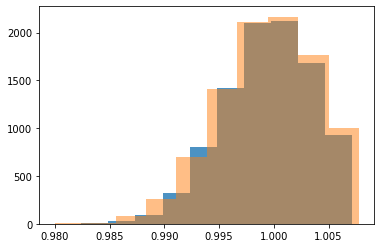

In [ ]:
theta = 1
steps_amt = 10000
sample_size = 100000

res_med = []
res_mle = []

for i in tqdm(range(steps_amt)):
    x = st.cauchy.rvs(loc=theta, size=sample_size)

    res_med.append(np.median(x))

    res_mle.append(
        opt.minimize(
            fun=lambda t: -np.sum(np.log(st.cauchy.pdf(loc=t, x=x))),
            x0=np.mean(x),
            method='SLSQP',
            options={'maxiter':1000}
        ).x[0]
    )

print('\n',
      f'MLE - theta in [{np.mean(np.array(res_mle) - theta) - np.var(np.array(res_mle) - theta)}, {np.mean(np.array(res_mle) - theta) + np.var(np.array(res_mle) - theta)}]\n',
      f'MED - theta in [{np.mean(np.array(res_med) - theta) - np.var(np.array(res_med) - theta)}, {np.mean(np.array(res_med) - theta) + np.var(np.array(res_med) - theta)}]\n'
)

plt.hist(np.array(res_mle)[np.abs(np.array(res_mle)) <= np.quantile(np.array(res_mle), 0.95)], alpha=0.8)
plt.hist(np.array(res_med)[np.abs(np.array(res_med)) <= np.quantile(np.array(res_med), 0.95)], alpha=0.5)
plt.show()

100%|██████████| 1000/1000 [00:16<00:00, 61.15it/s]



 MLE - theta in [-0.00036756385797973956, 1.7319430136726084e-05]
 MED - theta in [-0.0005178177253592402, -3.489540796592657e-05]



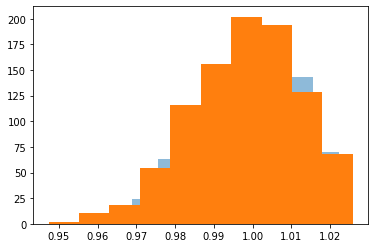

In [ ]:
theta = 1
steps_amt = 10000
sample_size = 100000

res_med = []
res_mle = []

for i in tqdm(range(steps_amt)):
    x = st.cauchy.rvs(loc=theta, size=sample_size)

    res_med.append(np.median(x))

    res_mle.append(
        opt.minimize(
            fun=lambda t: -np.sum(np.log(st.cauchy.pdf(loc=t, x=x))),
            x0=np.mean(x),
            method='BFGS',
            options={'maxiter':1000, 'gtol': 1e-09, 'eps': 1e-09}
        ).x[0]
    )

print('\n',
      f'MLE - theta in [{np.mean(np.array(res_mle) - theta) - np.var(np.array(res_mle) - theta)}, {np.mean(np.array(res_mle) - theta) + np.var(np.array(res_mle) - theta)}]\n',
      f'MED - theta in [{np.mean(np.array(res_med) - theta) - np.var(np.array(res_med) - theta)}, {np.mean(np.array(res_med) - theta) + np.var(np.array(res_med) - theta)}]\n'
)

plt.hist(np.array(res_mle)[np.abs(np.array(res_mle)) <= np.quantile(np.array(res_mle), 0.95)], alpha=0.5)
plt.hist(np.array(res_med)[np.abs(np.array(res_med)) <= np.quantile(np.array(res_med), 0.95)])
plt.show()

100%|██████████| 1000/1000 [00:12<00:00, 81.56it/s]



 MLE - theta in [-0.0013829310395913502, -0.0009548066670012485]
 MED - theta in [-0.0011450916273948787, -0.0006277472023999109]



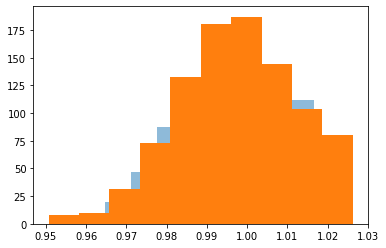

In [ ]:
theta = 1
steps_amt = 1000
sample_size = 10000

res_med = []
res_mle = []

for i in tqdm(range(steps_amt)):
    x = st.cauchy.rvs(loc=theta, size=sample_size)

    res_med.append(np.median(x))

    res_mle.append(
        opt.minimize(
            fun=lambda t: -np.sum(np.log(st.cauchy.pdf(loc=t, x=x))),
            x0=np.mean(x),
            method='L-BFGS-B',
            options={'maxiter':1000, 'gtol': 1e-09, 'eps': 1e-09}
        ).x[0]
    )

print('\n',
      f'MLE - theta in [{np.mean(np.array(res_mle) - theta) - np.var(np.array(res_mle) - theta)}, {np.mean(np.array(res_mle) - theta) + np.var(np.array(res_mle) - theta)}]\n',
      f'MED - theta in [{np.mean(np.array(res_med) - theta) - np.var(np.array(res_med) - theta)}, {np.mean(np.array(res_med) - theta) + np.var(np.array(res_med) - theta)}]\n'
)

plt.hist(np.array(res_mle)[np.abs(np.array(res_mle)) <= np.quantile(np.array(res_mle), 0.95)], alpha=0.5)
plt.hist(np.array(res_med)[np.abs(np.array(res_med)) <= np.quantile(np.array(res_med), 0.95)])
plt.show()

1.2. В партии пушек с некоторой вероятностью появляется пушка с браком. В файле Sample1.txt записаны точки падения снаряда при стрельбе одиночной качественной пушки по точке 0. В файле Sample2.txt - точки падения снаряда при стрельбе одиночной бракованной пушки. В файле Sample3.txt - итоги стрельбы батареи из большого числа различных пушек. Оценить вероятность брака.

In [ ]:
with open('/content/drive/MyDrive/Sample1.txt', 'r') as f:
    res = f.readlines()
    s1 = list(map(float, res[0].split(' ')))

with open('/content/drive/MyDrive/Sample2.txt', 'r') as f:
    res = f.readlines()
    s2 = list(map(float, res[0].split(' ')))


with open('/content/drive/MyDrive/Sample3.txt', 'r') as f:
    res = f.readlines()
    s3 = list(map(float, res[0].split(' ')))

In [ ]:
len(s1), len(s2), len(s3)

(4000, 6000, 3000)

X - точка попадания небракованной пушки.

Y - точка попадания бракованной пушки.

B $\sim Bernoulli(p)$, p -вероятность брака.

In [ ]:
p = (np.mean(s3) - np.mean(s1)) / (np.mean(s2) - np.mean(s1))
p

0.6570744518589786

1.3. Построить оценку методом спейсингов и ОМП для $X_i \sim N(\theta, 1)$ на 1000 выборок длины

а) 20

б) 50

в) 100

и сравнить среднюю квадратичскую погрешность.

In [ ]:
def mle(x):
    return opt.minimize(
            fun=lambda t: -np.sum(np.log(st.cauchy.pdf(loc=t, x=x))),
            x0=np.mean(x),
            method='SLSQP',
            options={'maxiter':1000}
        ).x[0]

def spacing(x):
    X = [-np.Inf] + sorted(x) + [np.Inf]
    n = len(x)

    f = lambda t: -np.sum(np.log([st.norm.cdf(x=X[i], loc=t) - st.norm.cdf(x=X[i-1], loc=t) for i in range(1, n+2)]))

    return opt.minimize(
            fun=f,
            x0=np.mean(x),
            method='SLSQP',
            options={'maxiter':1000}
        ).x[0]

In [ ]:
theta = 1
sample_amt = 1000
size = 20

res_mle = []
res_space = []

for i in tqdm(range(sample_amt)):
    x = st.norm.rvs(loc=theta, size=size)

    res_mle.append(mle(x))
    res_space.append(spacing(x))

print('\n', np.var(np.array(res_mle) - theta), np.var(np.array(res_space) - theta))

100%|██████████| 1000/1000 [00:33<00:00, 30.05it/s]


 0.0668441781409879 0.049704027645684316


In [ ]:
theta = 1
sample_amt = 1000
size = 50

res_mle = []
res_space = []

for i in tqdm(range(sample_amt)):
    x = st.norm.rvs(loc=theta, size=size)

    res_mle.append(mle(x))
    res_space.append(spacing(x))

print('\n', np.var(np.array(res_mle) - theta), np.var(np.array(res_space) - theta))

100%|██████████| 1000/1000 [00:57<00:00, 17.39it/s]


 0.027086483945048267 0.020419983736296814


In [ ]:
theta = 1
sample_amt = 1000
size = 100

res_mle = []
res_space = []

for i in tqdm(range(sample_amt)):
    x = st.norm.rvs(loc=theta, size=size)

    res_mle.append(mle(x))
    res_space.append(spacing(x))

print('\n', np.var(np.array(res_mle) - theta), np.var(np.array(res_space) - theta))

100%|██████████| 1000/1000 [01:51<00:00,  8.97it/s]


 0.013684966354553655 0.00987305437064329
